In [1]:
#!pip install pandas sklearn
import numpy as np
from numpy.linalg import eig
from numpy import array, mean, cov, argsort, arange, linspace
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# PYSOM LIBRARY MODULES:
import pysom
from pysom.node import Node
from pysom.graph import Graph
from pysom.nodes.bmu import BMU
from pysom.nodes.dist import Dist
from pysom.nodes.concat import Concat
from pysom.nodes.calibrate import Calibrate
from pysom.nodes.som import SOM, nhood_mexican, nhood_gaussian, nhood_bubble, dist_manhattan, dist_cosine

In [2]:
animal = ['Dove', 'Chicken', 'Duck', 'Goose', 'Owl', 'Hawk', 'Eagle', 'Fox', 'Dog', 'Wolf', 'Cat', 'Tiger', 'Lion', 'Horse', 'Zebra', 'Cow']
features = [
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],    # Dove
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],    # Chicken
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],    # Duck
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],    # Goose
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Owl
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Hawk
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Eagle
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Fox
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],    # Dog
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Wolf
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Cat
    [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],    # Tiger
    [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Lion
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Horse
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Zebra
    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]     # Cow
]

feats = pd.DataFrame(features)
feats.columns = ['Small', 'Medium', 'Big', '2-legs', '4-legs', 'Hair', 'Hooves', 'Mane', 'Feathers', 'Hunt', 'Run', 'Fly', 'Swim']

data = array(feats.values, dtype=float)

In [3]:
plt.rcParams["figure.figsize"] = (20, 10)

def plot_features(size, out):
    for bmu, labels in out.items():
        labels = list(labels)
        print(labels)

        for i in range(len(labels)):
            plt.text(bmu[0] + 0.1, bmu[1] + (i + 1) / len(labels) - 0.35, labels[i], fontsize=20)

    plt.xticks(np.arange(size + 1))
    plt.yticks(np.arange(size + 1))
    plt.grid()
    plt.show()

['Dove']
['Chicken']
['Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox']
['Dog', 'Wolf']
['Cat']
['Tiger']
['Lion']
['Horse', 'Zebra']
['Cow']


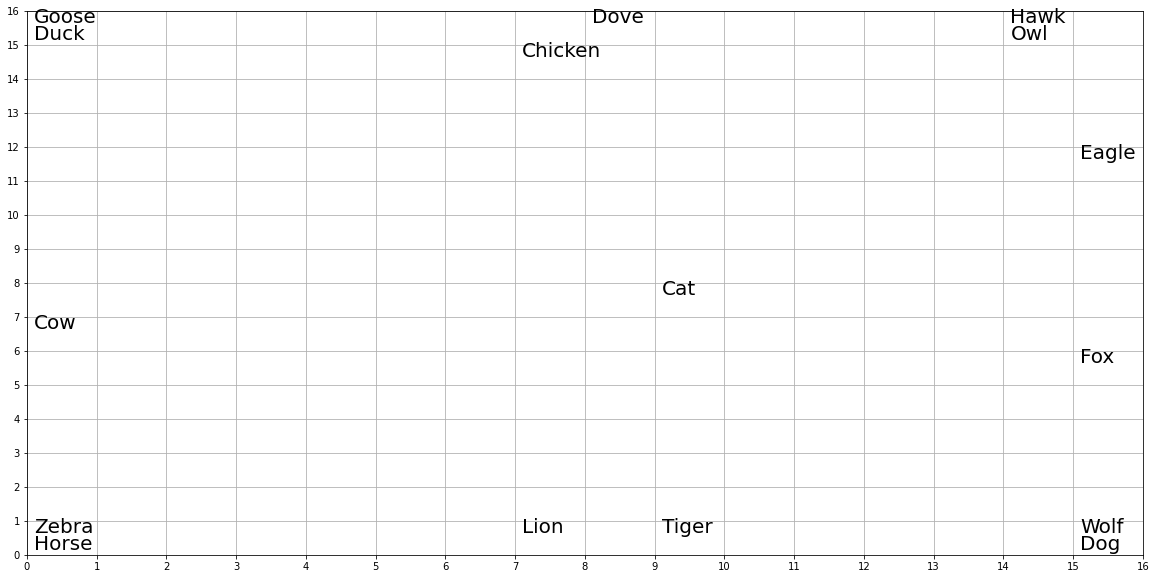

In [14]:
g = Graph()

size = 16
som = g.create(SOM, props={'size': size, 'dim': 13, 'pca': True, 'norm': True, 'rand_state': True,
                            'nhood': nhood_gaussian, 'sigma': 13, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)

['Dove']
['Chicken']
['Duck']
['Goose']
['Owl', 'Hawk']
['Eagle']
['Fox']
['Dog', 'Wolf']
['Cat']
['Tiger', 'Lion']
['Horse', 'Zebra']
['Cow']


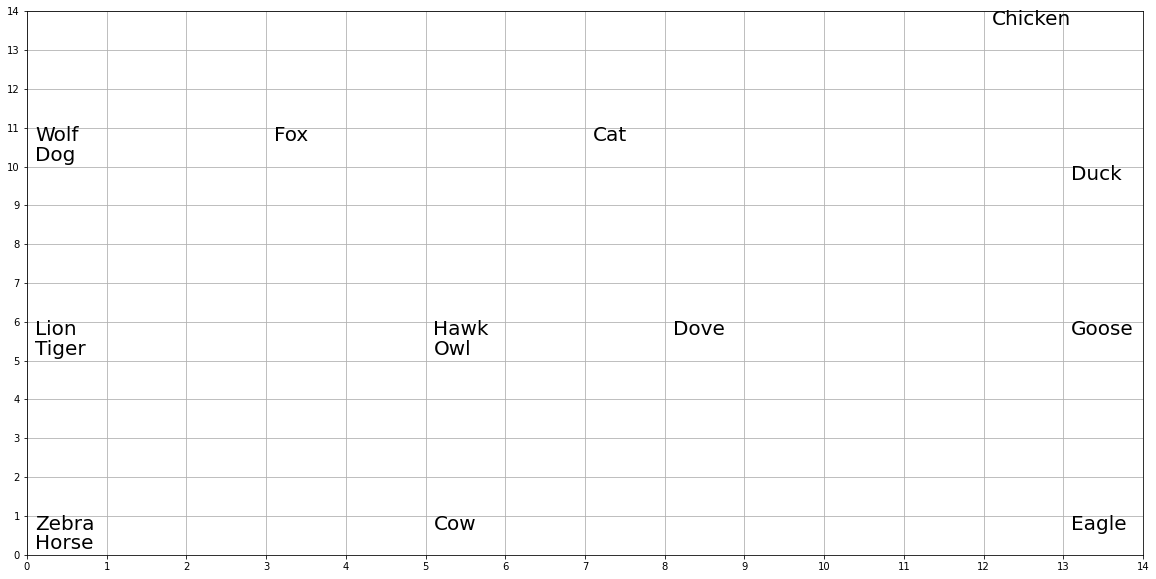

In [18]:
g = Graph()

size = 14
som = g.create(SOM, props={'size': size, 'dim': 13, 'pca': True, 'norm': True, 'rand_state': True,
                            'nhood': nhood_bubble, 'sigma': 13, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)

['Dove']
['Chicken']
['Duck']
['Goose']
['Owl', 'Hawk']
['Eagle']
['Fox']
['Dog', 'Wolf']
['Cat']
['Tiger', 'Lion']
['Horse', 'Zebra']
['Cow']


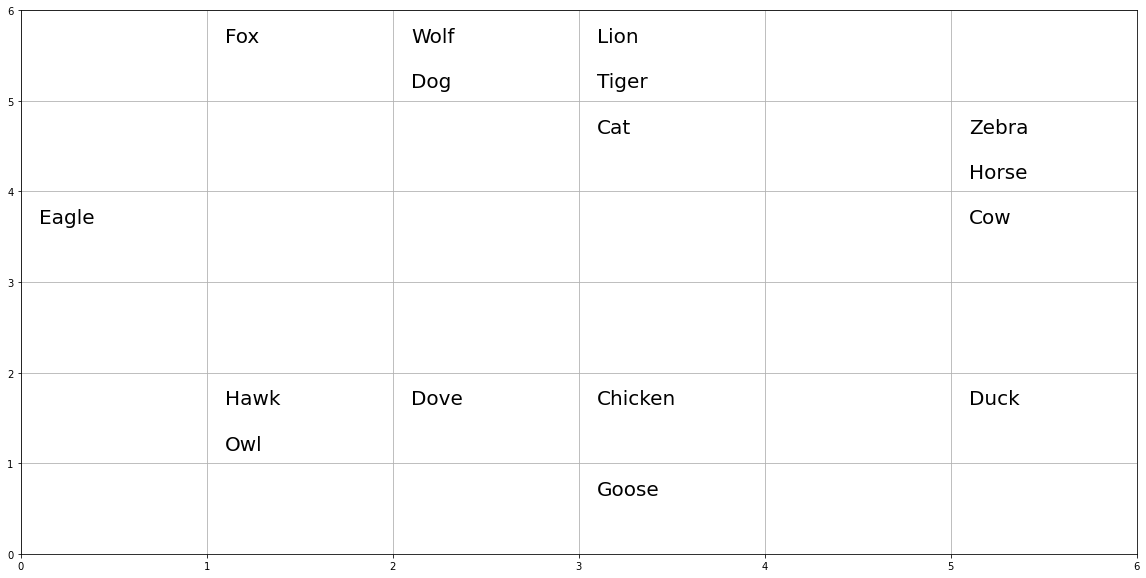

In [10]:
g = Graph()

size = 6
som = g.create(SOM, props={'size': size, 'dim': 13, 'pca': True, 'norm': True, 'rand_state': True,
                            'nhood': nhood_mexican, 'sigma': 13, 'lr': 0.8, 'n_iters': 1000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

g.set_input(data)

out = g.get_output()
plot_features(size, out)